#NAGA HARIVADANA KALAPATAPU (2073200)
##CSC 578 - NEURAL NETWORKS AND DEEP LEARNING 
###FINAL PROJECT
###KAGGLE NAME: NAGA KALAPATAPU
###KAGGLE RANK: 27 
###KAGGLE SCORE: 307.09243
###MY INITIALS: NHK

IMPORTS 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 

import warnings
warnings.filterwarnings('ignore')

EDA 

In [ ]:
data = pd.read_csv("/content/Metro_Interstate_reduced.csv", parse_dates= ["date_time"])
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.8+ MB


The features "holiday," "weather_description," and "weather_main" are categorical variables.
The features "temp," "rain_1h," "snow_1h," "clouds_all," and "traffic_volume" are continuous variables.
The feature "date_time" is a datetime variable.

In [ ]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474
std,13.816618,48.812640,0.005676,38.683447,1984.772909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


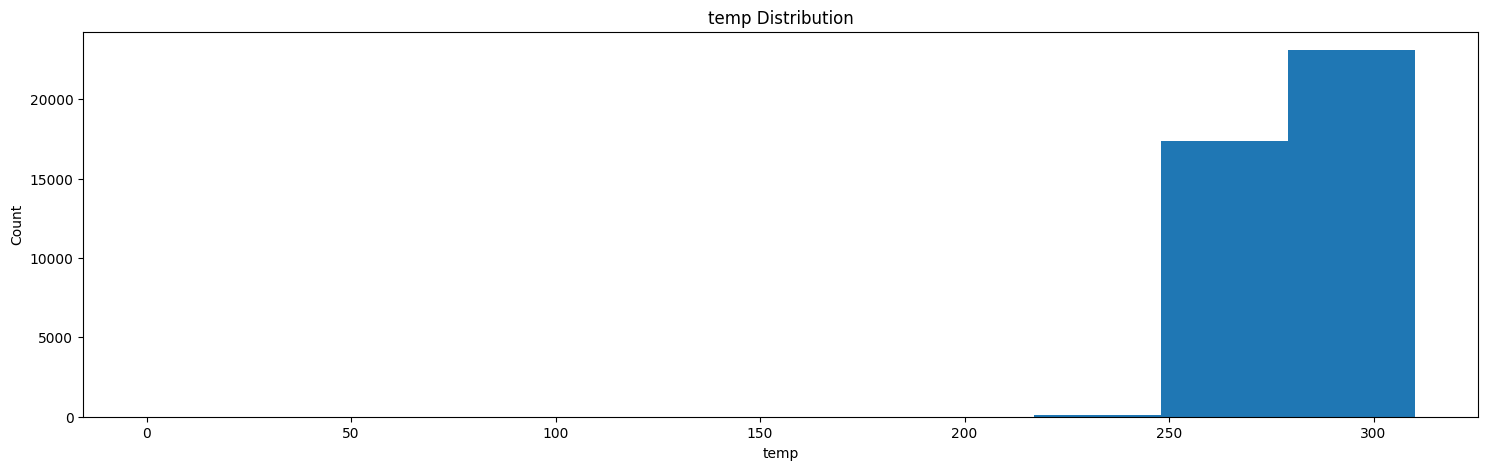

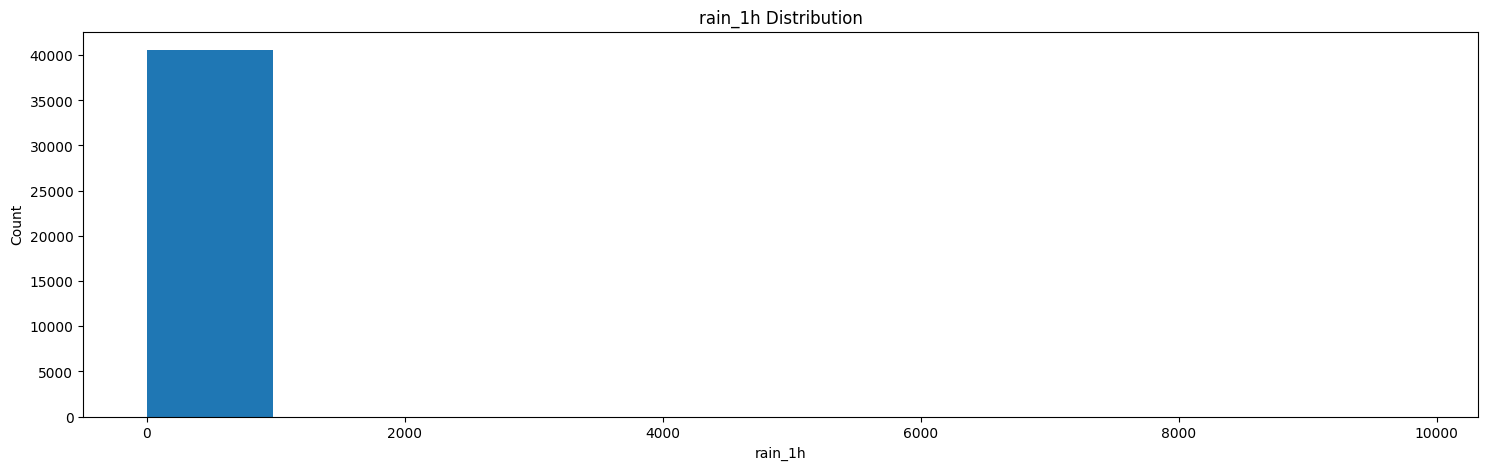

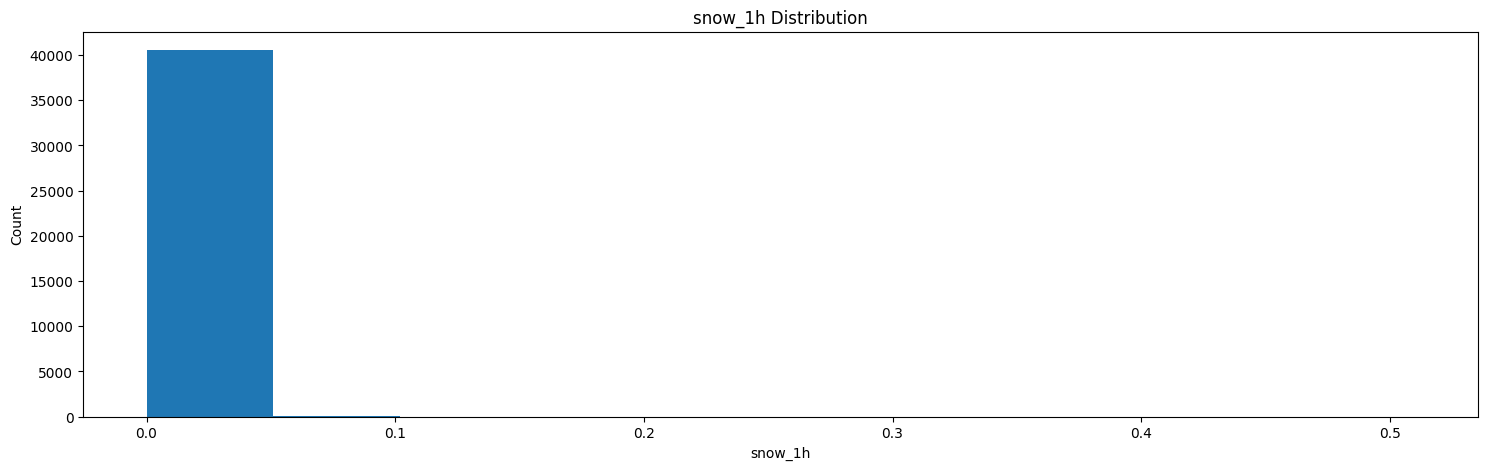

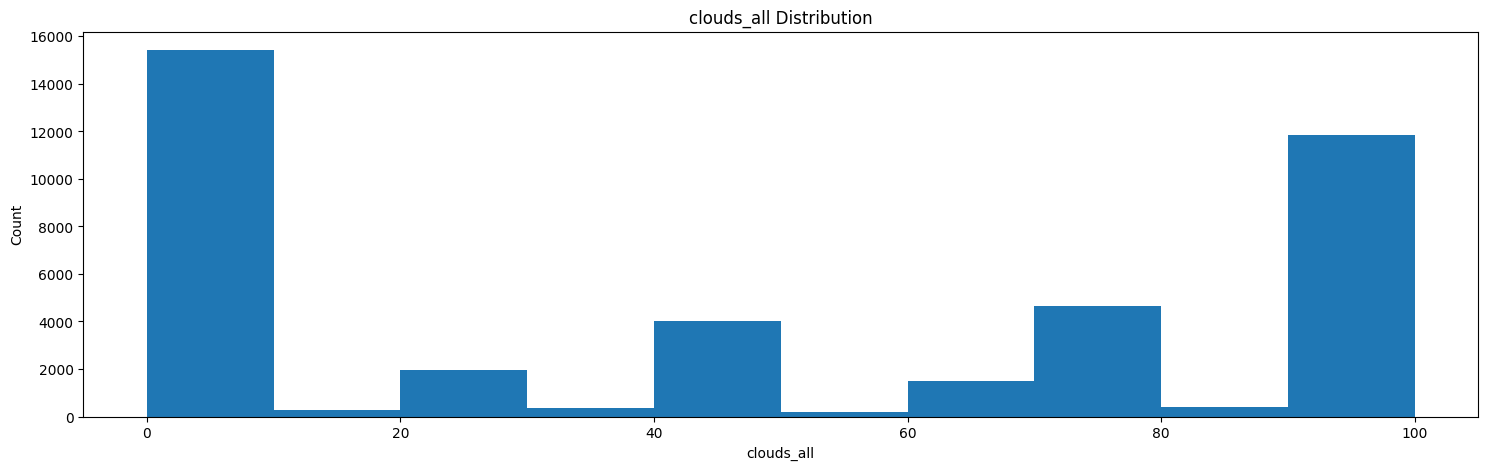

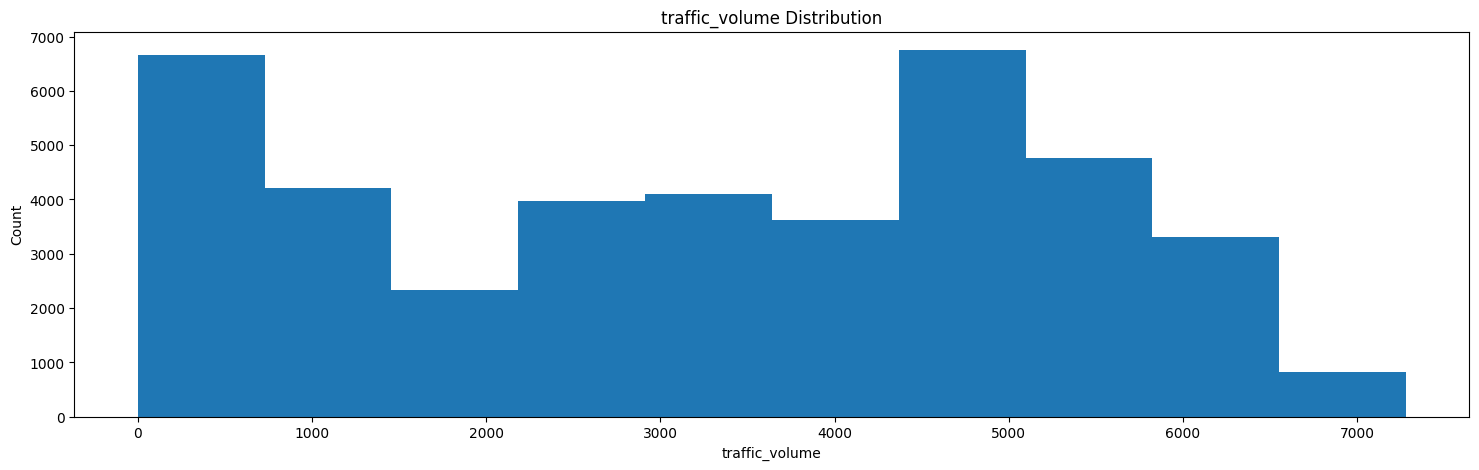

In [ ]:
cont_feats = ["temp", "rain_1h","snow_1h","clouds_all","traffic_volume"]
for feats in cont_feats:
    fig,ax = plt.subplots(figsize = (18,5))
    plt.hist(data[feats])
    plt.ylabel("Count")
    plt.xlabel(feats)
    plt.title(label = feats + str(" Distribution"))
    plt.show()

Outlier values are present in the variables "rain_1h," "temp," and "snow_1h."

Evolution of feature over time 

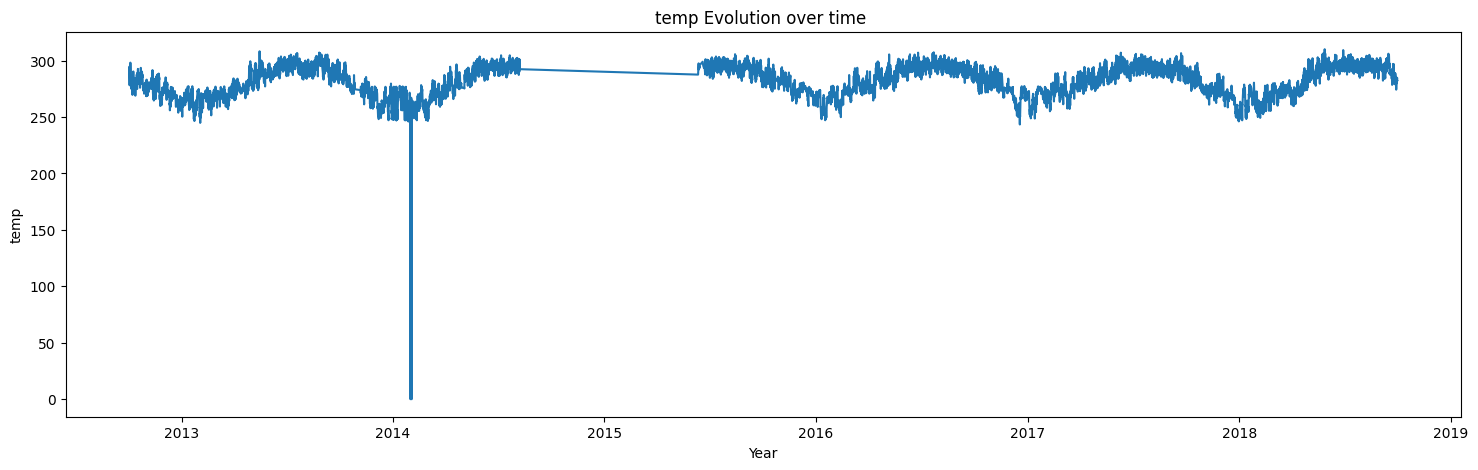

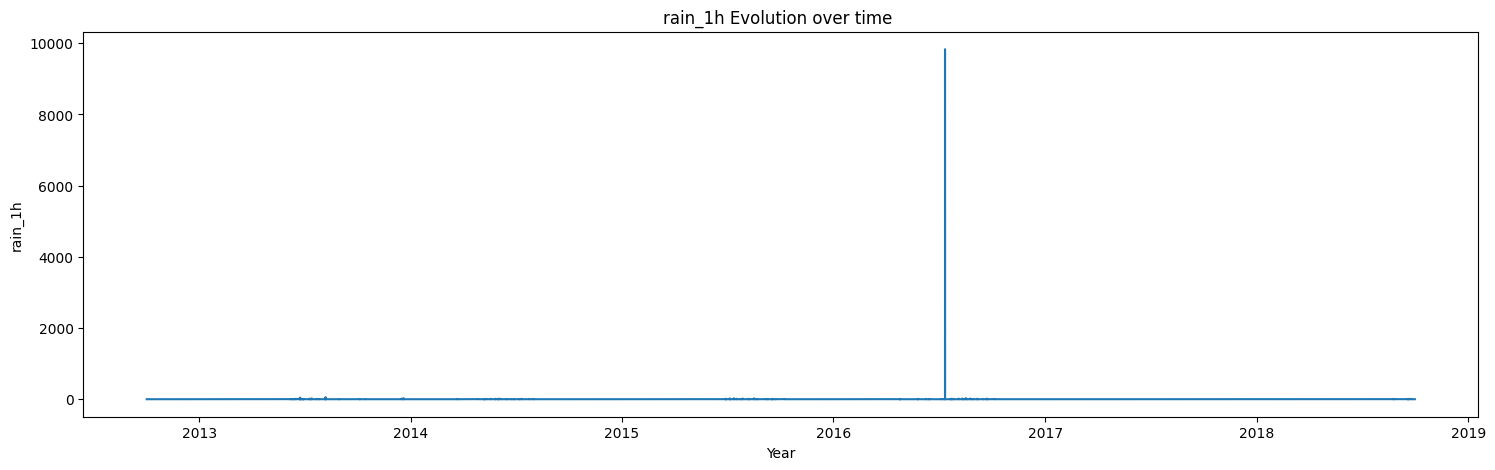

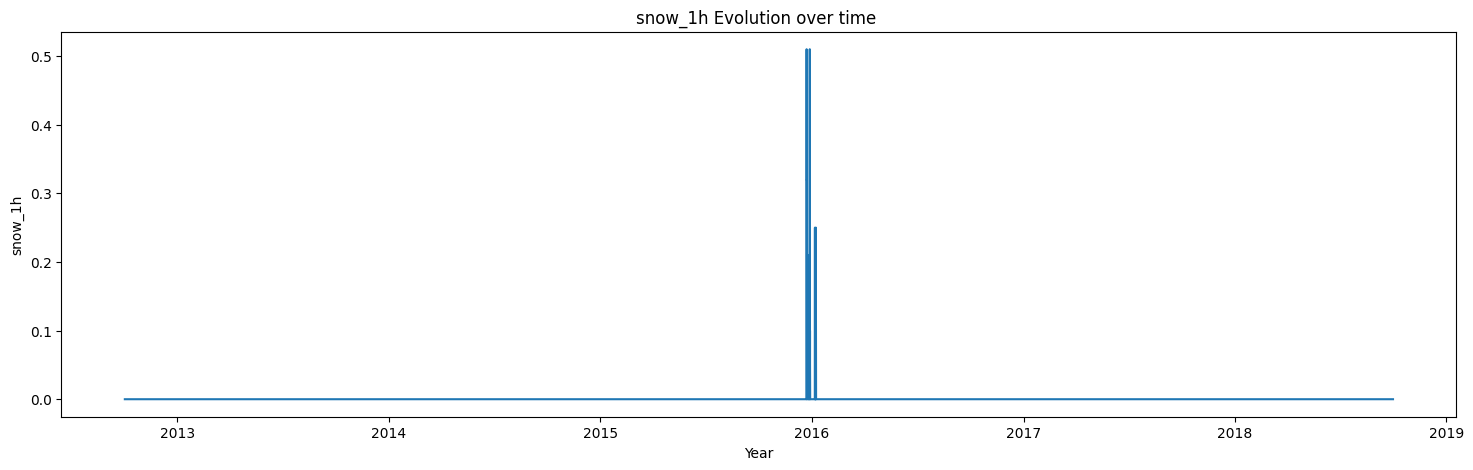

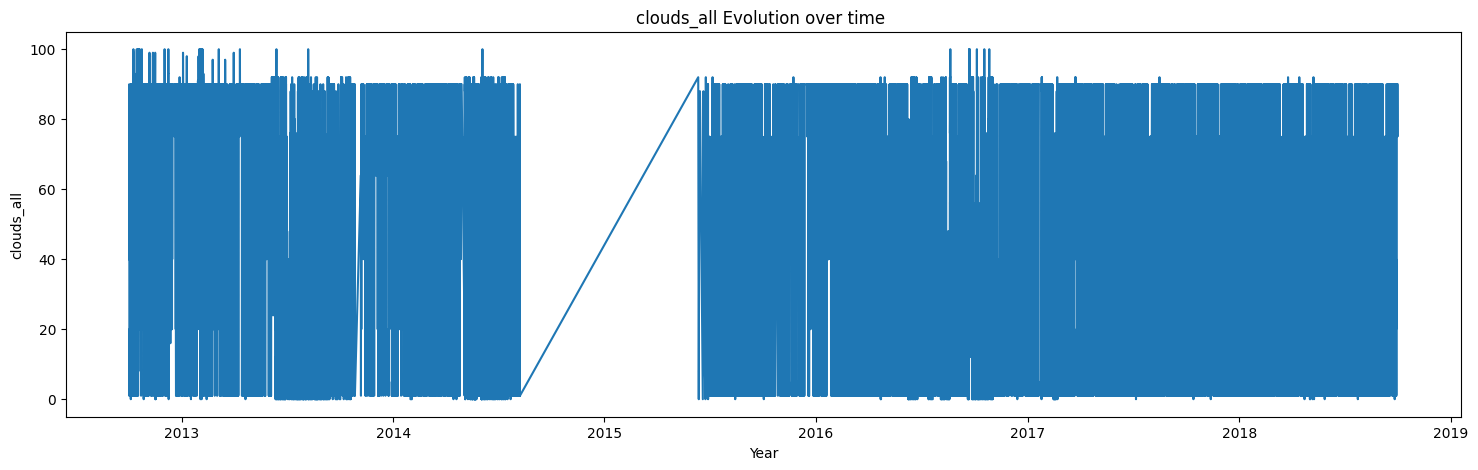

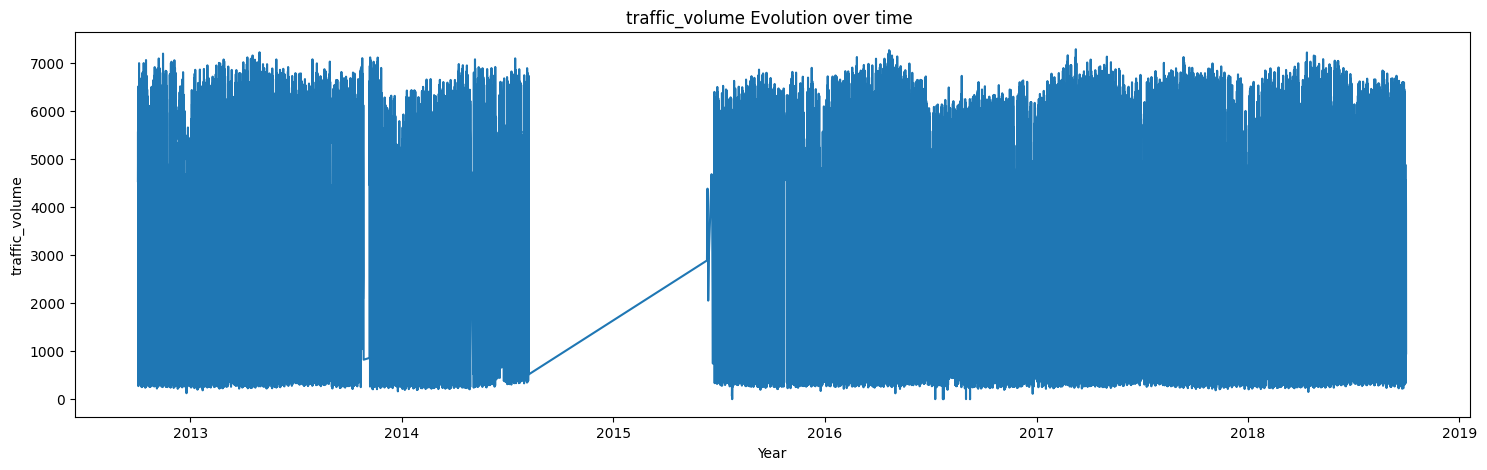

In [ ]:
cont_feats = ["temp", "rain_1h","snow_1h","clouds_all","traffic_volume"]
for feats in cont_feats:
    fig,ax = plt.subplots(figsize = (18,5))
    plt.plot(data["date_time"], data[feats])
    plt.xlabel("Year")
    plt.ylabel(feats)
    plt.title(label = feats + str(" Evolution over time "))
    plt.show()

In [ ]:
data["holiday"].value_counts()

None                         40522
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

Replacing the "holiday" feature with an "is_holiday" feature would serve as a significant binary feature. The "holiday" feature currently consists of several values representing different holidays throughout the year. By transforming it into an "is_holiday" feature, it would indicate the presence or absence of a holiday, providing a valuable binary distinction.

Feature Engineering

Temp Feature

In [1]:
#NHK

In [ ]:
## from the eda, it was quite evident temp feature had some outliers. Lets verify them 
print("Outlier Temperature = ", data["temp"].min())
print("Rows with oulier temperature : ", len(data[data["temp"] <= 200]))

Outlier Temperature =  0.0
Rows with oulier temperature :  10


In [2]:
#NHK

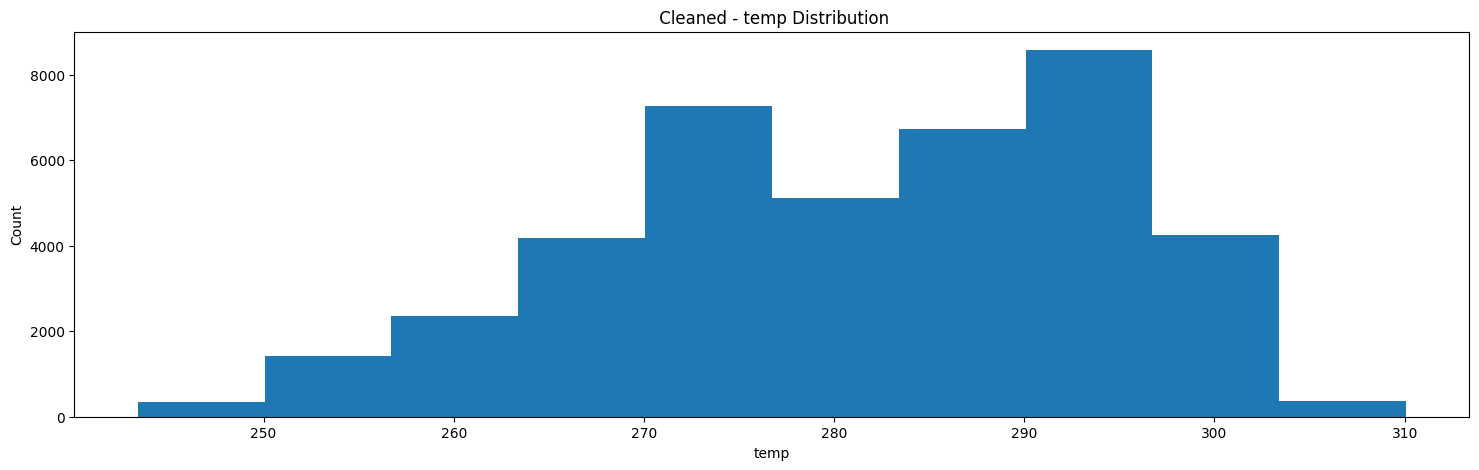

In [ ]:
##The recoreded temperature is provided in Kelvin and 0' represent celcius. 
## Converting outliers to normal range 

data.loc[data["temp"] == 0, "temp" ] = 273

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["temp"])
plt.ylabel("Count")
plt.xlabel("temp")
plt.title(label = " Cleaned - temp" + str(" Distribution"))
plt.show()

Rain Feature 

In [ ]:
#Let's verify the presence of outliers in the "rain_1h" feature, as indicated by the exploratory data analysis (EDA)
print("Outlier Rain Value = ", data["rain_1h"].max())
print("Rows with oulier Rain Value : ", len(data[data["rain_1h"] >= 5]))

Outlier Rain Value =  9831.3
Rows with oulier Rain Value :  138


In [3]:
#NHK

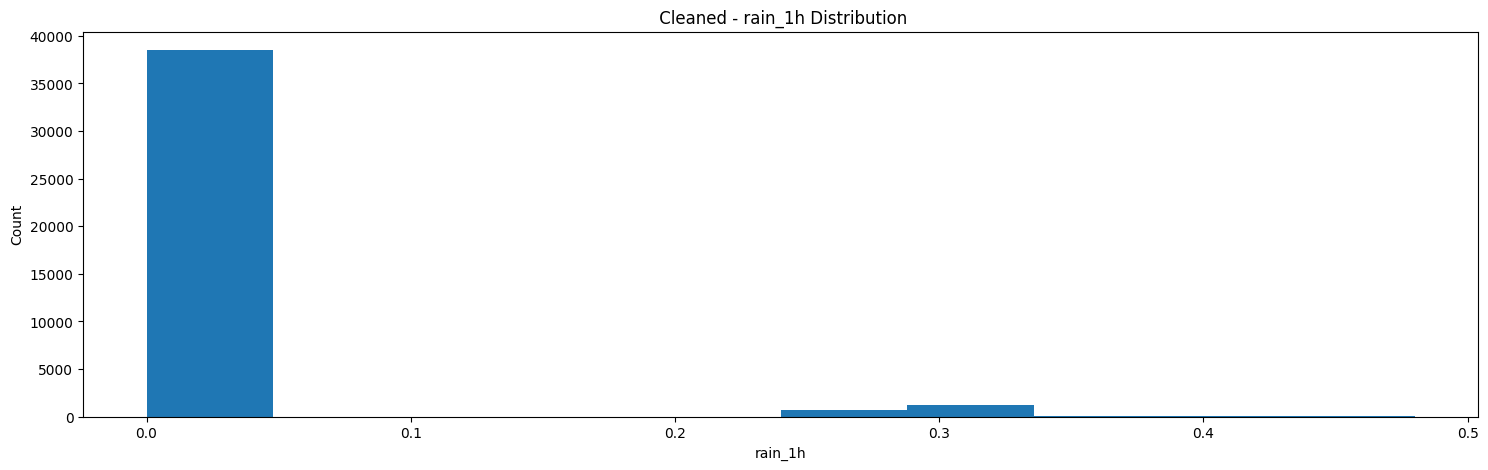

In [ ]:
#To address the outliers in the "rain_1h" feature, you can scale the outlier values towards the mean value.
data.loc[data["rain_1h"] >= 0.5, "rain_1h" ] = data["rain_1h"].mean()

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["rain_1h"])
plt.ylabel("Count")
plt.xlabel("rain_1h")
plt.title(label = " Cleaned - rain_1h" + str(" Distribution"))
plt.show()

Snow Feature 

In [ ]:
#Let's verify the presence of outliers in the "snow_1h" feature, as indicated by the exploratory data analysis (EDA)

print("Outlier Rain Value = ", data["snow_1h"].max())
print("Rows with oulier Rain Value : ", len(data[data["snow_1h"] >= 0.0001]))

Outlier Rain Value =  0.51
Rows with oulier Rain Value :  31


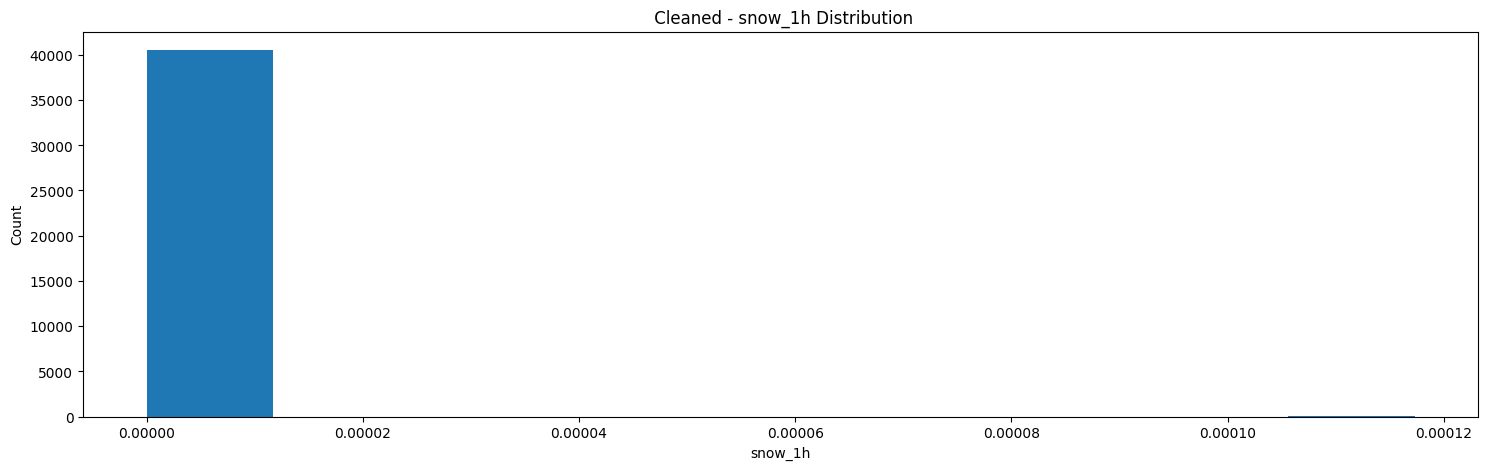

In [ ]:
#To address the outliers in the "snow_1h" feature, you can scale the outlier values towards the mean value.
data.loc[data["snow_1h"] >=0.0001, "snow_1h" ] = data["snow_1h"].mean()

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["snow_1h"])
plt.ylabel("Count")
plt.xlabel("snow_1h")
plt.title(label = " Cleaned - snow_1h" + str(" Distribution"))
plt.show()

Even after scaling the values of "rain_1h" and "snow_1h" closer to the mean, it is important to note that these outliers can still play a significant role in predicting traffic for the next 3-hour time frame. By preserving the outlier significance during feature engineering, we acknowledge their potential impact on the prediction model.

 Holiday Feature 

In [ ]:
print("Number of rows with holidays : ", len(data[data["holiday"] != "None"]))

#Converting the "holiday" feature into a binary feature, you can replace all instances of holidays with 1 and the absence of holidays with 0

data["holiday"] = data["holiday"].apply( lambda x: 0 if x == "None" else 1 )

Number of rows with holidays :  53


Considering that the "weather_main" and "weather_description" features have multiple imbalanced categories, it might be appropriate to drop these features during the modeling process. Removing these features can help simplify the model and prevent potential issues caused by imbalanced data distribution.

In [ ]:
drop_columns = ["weather_main", "weather_description", "date_time"]

# dropping unwanted columns 
data = data.drop(drop_columns, axis = 1 )

Spliting the data 

In [ ]:
val_split = len(data) - 10000
test_split = len(data)- 4986


# Dropping last 10000 rows for validation and test split
train_data = data.iloc[:val_split]

val_data = data.iloc[val_split:test_split]

test_data = data.iloc[test_split:]

print("Number of rows in train_data = ", len(train_data))
print("Number of rows in val_data = ", len(val_data))
print("Number of rows in test_data = ", len(test_data))

Number of rows in train_data =  30575
Number of rows in val_data =  5014
Number of rows in test_data =  4986


Normalizing the data 

In [ ]:
# From TF Tutorial
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

 Normalized Feature Visualization 

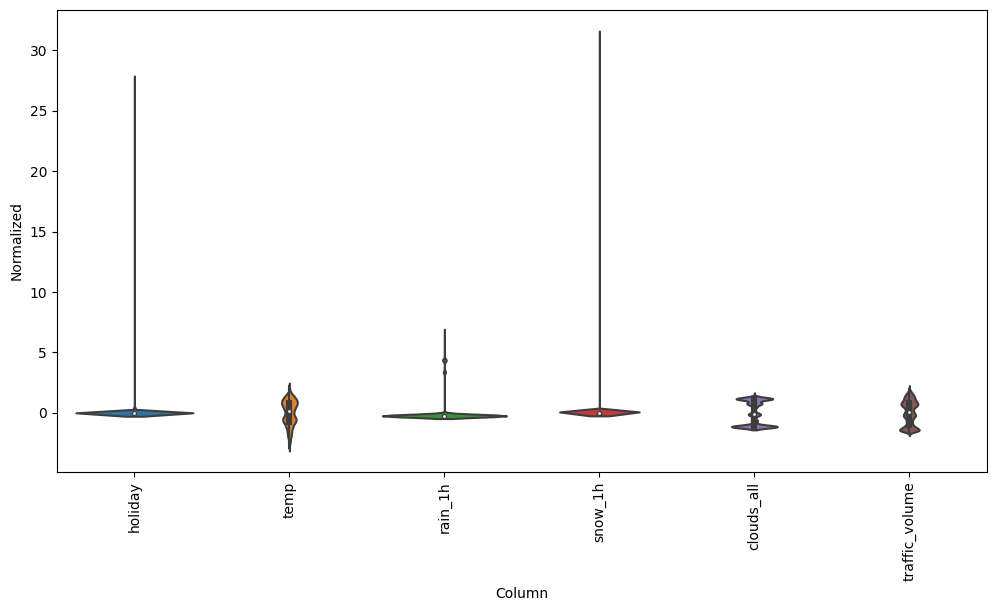

In [ ]:
# From TF Tutorial
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

Windowing datast 

In [ ]:
# From TF Tutorial
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=val_data, test_df=test_data,
               label_columns=None):
        # stroring the train test ans validation split 
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        #Storing the label column nmae
        self.label_columns = label_columns
        if label_columns is not None:
            ## indicies of label column 
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        # column indicies
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # window size and offset parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift
        
        #input window slice and indicies 
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        #output window slice and indicies
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [ ]:
#The input window size is 12 hours, which means that you consider the data from the past 12 hours as input for prediction. Additionally, the prediction is to be made for a time period that is 3 hours after the end of the input window. 
input_window_width = 12
offset = 3
output_width = 1 

# From TF Tutorial
window_5_1_2 = WindowGenerator(input_width=input_window_width, 
                     label_width=output_width, 
                     shift=offset,
                     label_columns = ["traffic_volume"])
window_5_1_2

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

Window Split 

In [ ]:
# From TF Tutorial
def split_window(self, features):
    
    # spliting inputs at axis = 1
    inputs = features[:, self.input_slice, :]
    
    # spliting output labels as at axis = 1
    labels = features[:, self.labels_slice, :]
    
    
    if self.label_columns is not None:
        
        # stacking labels columns along the last axis 
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # reshaping outputs
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window


#  example of spltting windows on our dataset

example_window = tf.stack([np.array(train_data[:window_5_1_2.total_window_size]),
                           np.array(train_data[100:100+window_5_1_2.total_window_size]),
                           np.array(train_data[200:200+window_5_1_2.total_window_size])])

example_inputs, example_labels = window_5_1_2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 15, 6)
Inputs shape: (3, 12, 6)
Labels shape: (3, 1, 1)


Window Plot 

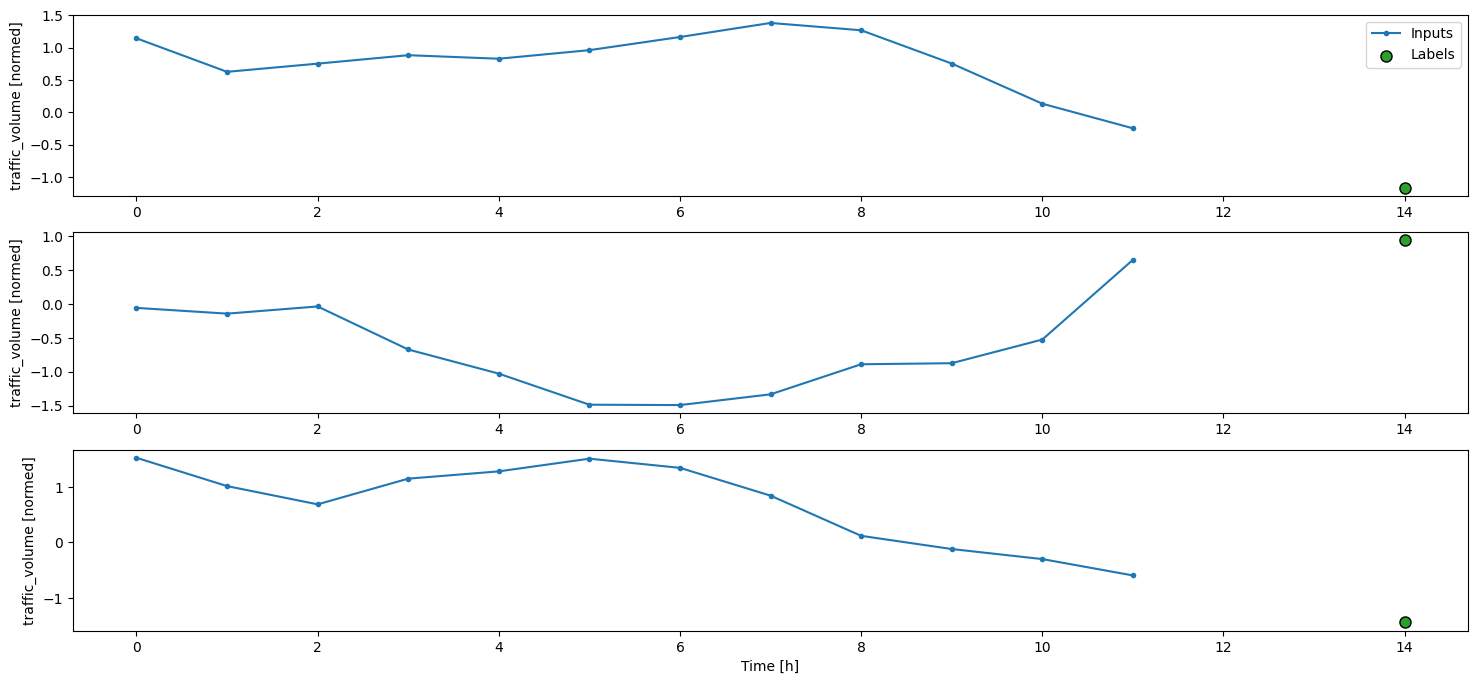

In [ ]:
# From TF Tutorial
window_5_1_2.example = example_inputs, example_labels

def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    # extracting inputs and outputs from our example data
    inputs, labels = self.example
    
    # seting up fig size
    plt.figure(figsize=(18, 8))
    
    # setting up column index for plot 
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    # itertaing over subplots
    for n in range(max_n):
        
        # plotting every subplots
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        
        # inputs points  plot as a single line
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue
        
        # scatter plot for all output/label points 
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
        # if model predictions are to be printed 
        if model is not None:
            #  getting predictions from model
            predictions = model(inputs)
            
            # expanding the share of predictions across axis = 1
            predictions = np.expand_dims(predictions , 1 )
            
            # scatter plot for all prediction points
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

window_5_1_2.plot(plot_col = "traffic_volume")

## Windows to tf.dataset 

In [ ]:
# From TF Tutorial
def make_dataset(self, data, shuffle  = True):
    
    # conversion of data from pandas dataframe to numpy arrays
    data = np.array(data, dtype=np.float32)
    
    # conversion of numpy arrays to tensorflow dataset
    ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=shuffle,
      batch_size=32,)
    
    # mapping  input tensors to the split_window function
    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset


# property functions 
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df,shuffle= False )

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
    # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
    # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### Inspecing tf dataset 

In [ ]:
train_batch = next(iter(window_5_1_2.train)) 
print("length of each batch = ",len(train_batch[0]))
print("Input tensors shape = ", train_batch[0].shape)
print("Output/Label tensors shape = ", train_batch[1].shape)

print("Sample Output tensor/labels : ",train_batch[1][:5] )

length of each batch =  32
Input tensors shape =  (32, 12, 6)
Output/Label tensors shape =  (32, 1, 1)
Sample Output tensor/labels :  tf.Tensor(
[[[-0.6603182]]

 [[-0.6961015]]

 [[ 0.3713499]]

 [[-1.3719524]]

 [[-0.4274747]]], shape=(5, 1, 1), dtype=float32)


Baseline Model ( RNN MODEL ) 

In [ ]:
# code for common training function for different models 
# From TF Tutorial

def compile_and_fit(model, window, NUM_EPOCHS, LR ):
    # early stopping to stop training ofter validation loss increases
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2 ,
                                                    mode='min')
    
    # compiling model
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(LR),
                metrics=[tf.metrics.MeanAbsoluteError()])
    
    # training model 
    history = model.fit(window.train, epochs=NUM_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping], 
                        verbose = 0) ## set verbosity to zero
    return history

In [4]:
#NHK

157/157 [==============================] - 1s 3ms/step - loss: 0.1881 - mean_absolute_error: 0.3004


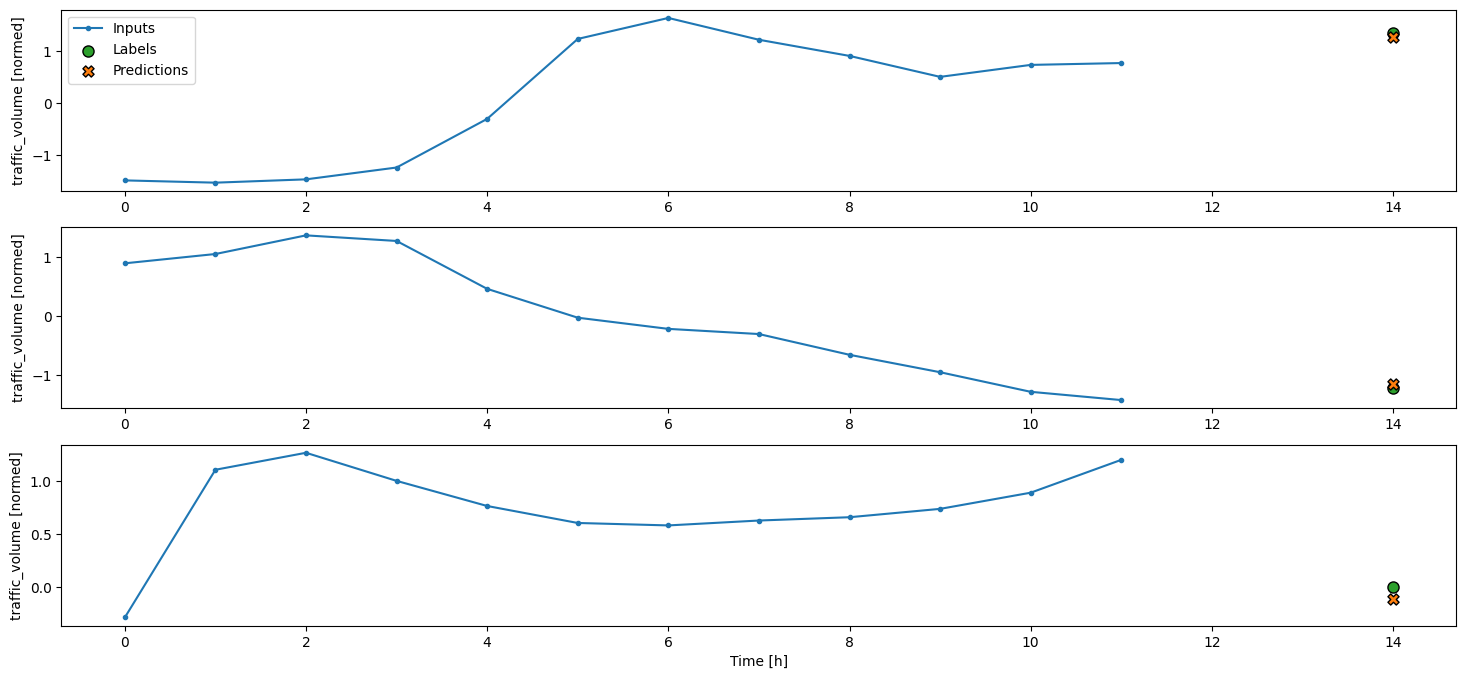

In [ ]:
#We will create a simple baseline model using a single layer of RNN
val_performance = {}
performance = {}

baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    tf.keras.layers.Dense(1)
])
NUM_EPOCHS = 30
LR = 0.01


history = compile_and_fit(baseline_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['Baseline'] = baseline_model.evaluate(window_5_1_2.val)
performance['Baseline'] = baseline_model.evaluate(window_5_1_2.test, verbose=0)

window_5_1_2.plot(baseline_model)

Bidirectional RNN Model 

In [5]:
#NHK

157/157 [==============================] - 1s 4ms/step - loss: 0.3403 - mean_absolute_error: 0.4805


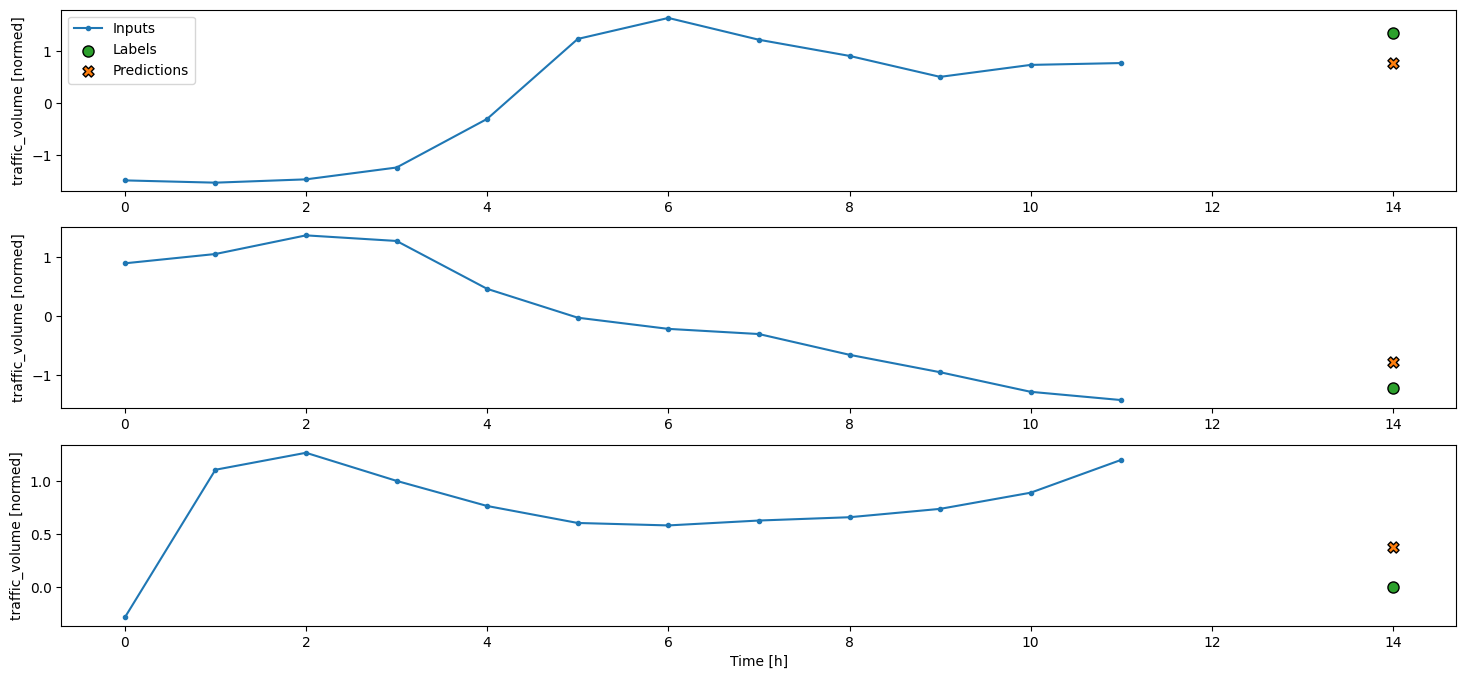

In [ ]:
Bi_RNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=False)),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 30
LR = 0.01

history = compile_and_fit(Bi_RNN_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['BI-RNN'] = Bi_RNN_model.evaluate(window_5_1_2.val)
performance['BI-RNN'] = Bi_RNN_model.evaluate(window_5_1_2.test, verbose=0)

window_5_1_2.plot(Bi_RNN_model)

LSTM MODEL 

157/157 [==============================] - 0s 2ms/step - loss: 0.0793 - mean_absolute_error: 0.1906


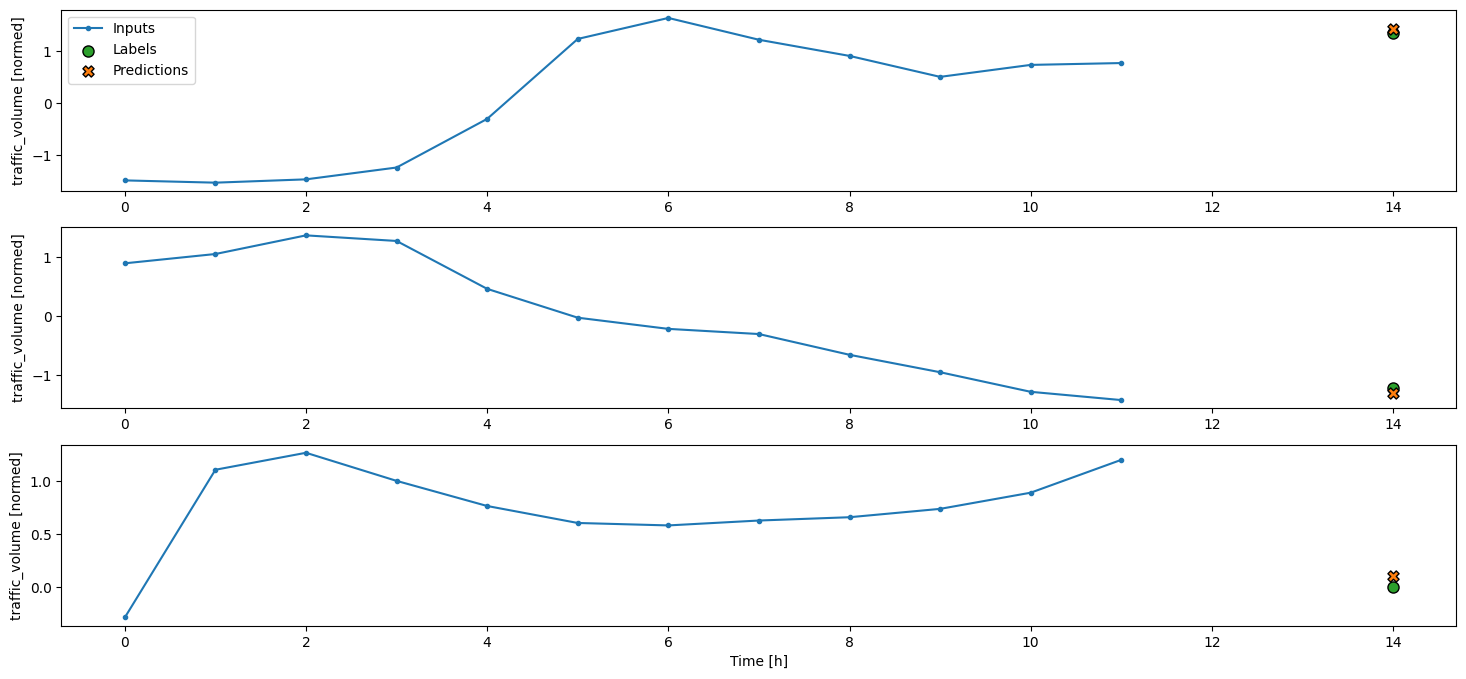

In [ ]:
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 30
LR = 0.01

history = compile_and_fit(LSTM_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['LSTM'] = LSTM_model.evaluate(window_5_1_2.val)
performance['LSTM'] = LSTM_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(LSTM_model)

STACKED LSTM MODEL 

In [6]:
#NHK

157/157 [==============================] - 1s 3ms/step - loss: 0.0923 - mean_absolute_error: 0.2089


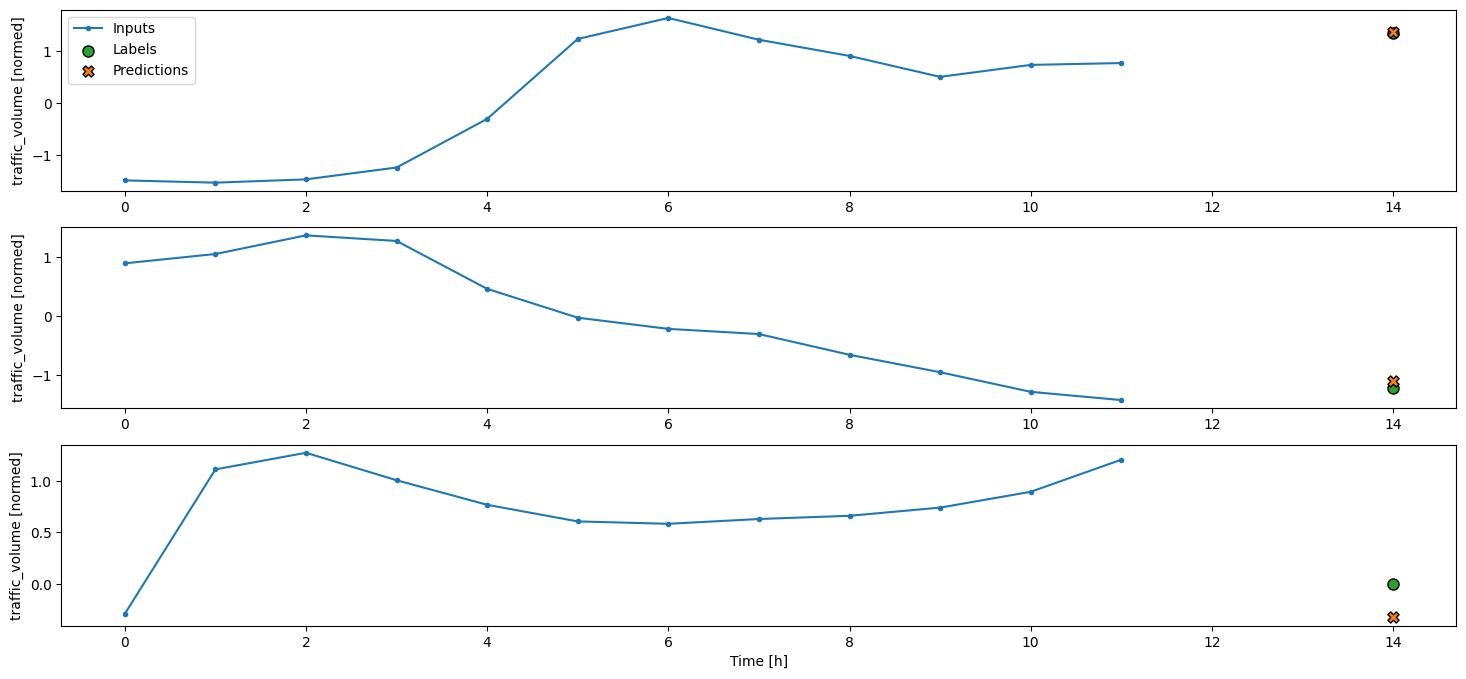

In [ ]:
Stack_LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 30
LR = 0.01

history = compile_and_fit(Stack_LSTM_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['STACKED_LSTM'] = Stack_LSTM_model.evaluate(window_5_1_2.val)
performance['STACKED_LSTM'] = Stack_LSTM_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(Stack_LSTM_model)

Bidirectional LSTM Model 

In [7]:
#NHK

157/157 [==============================] - 0s 3ms/step - loss: 0.0903 - mean_absolute_error: 0.2077


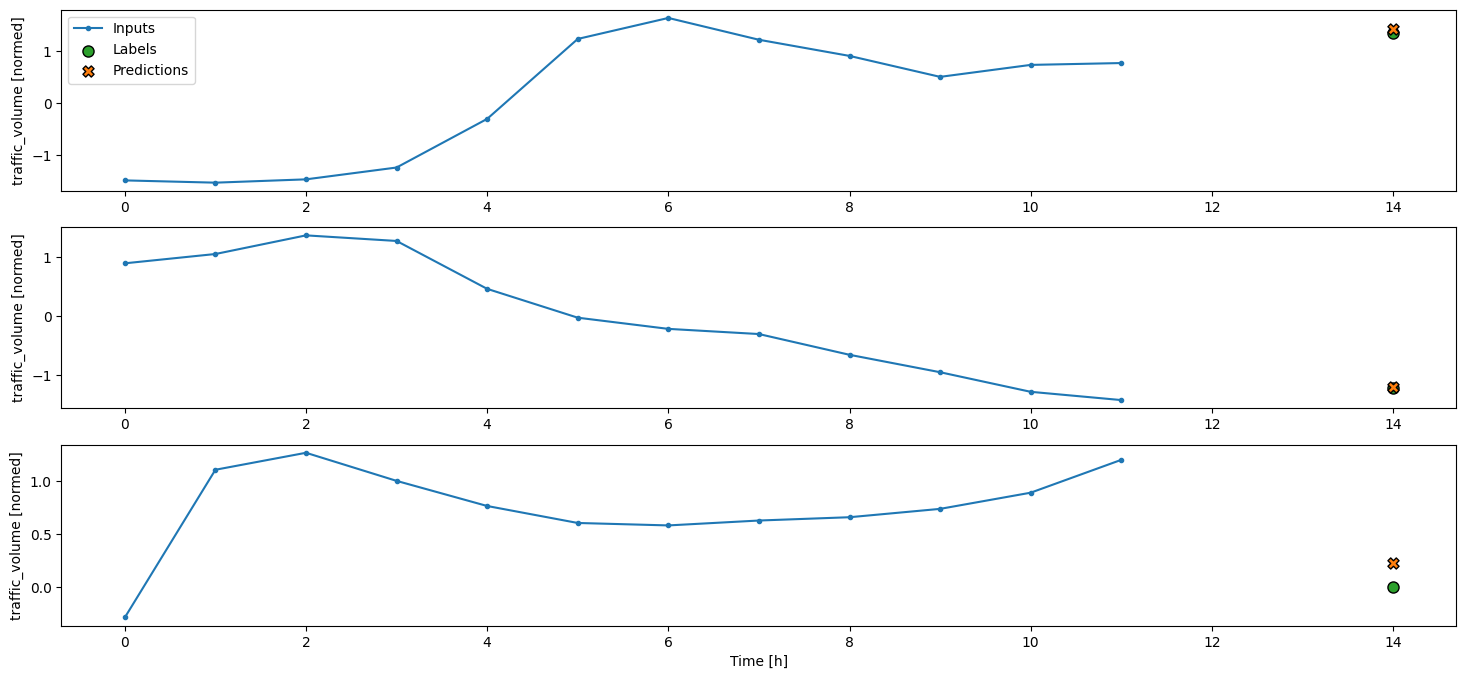

In [ ]:
Bi_LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 30
LR = 0.01

history = compile_and_fit(Bi_LSTM_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['BI-LSTM'] = Bi_LSTM_model.evaluate(window_5_1_2.val)
performance['BI-LSTM'] = Bi_LSTM_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(Bi_LSTM_model)

1-D CNN with LSTMS 

In [8]:
#NHK

157/157 [==============================] - 0s 2ms/step - loss: 0.1217 - mean_absolute_error: 0.2412


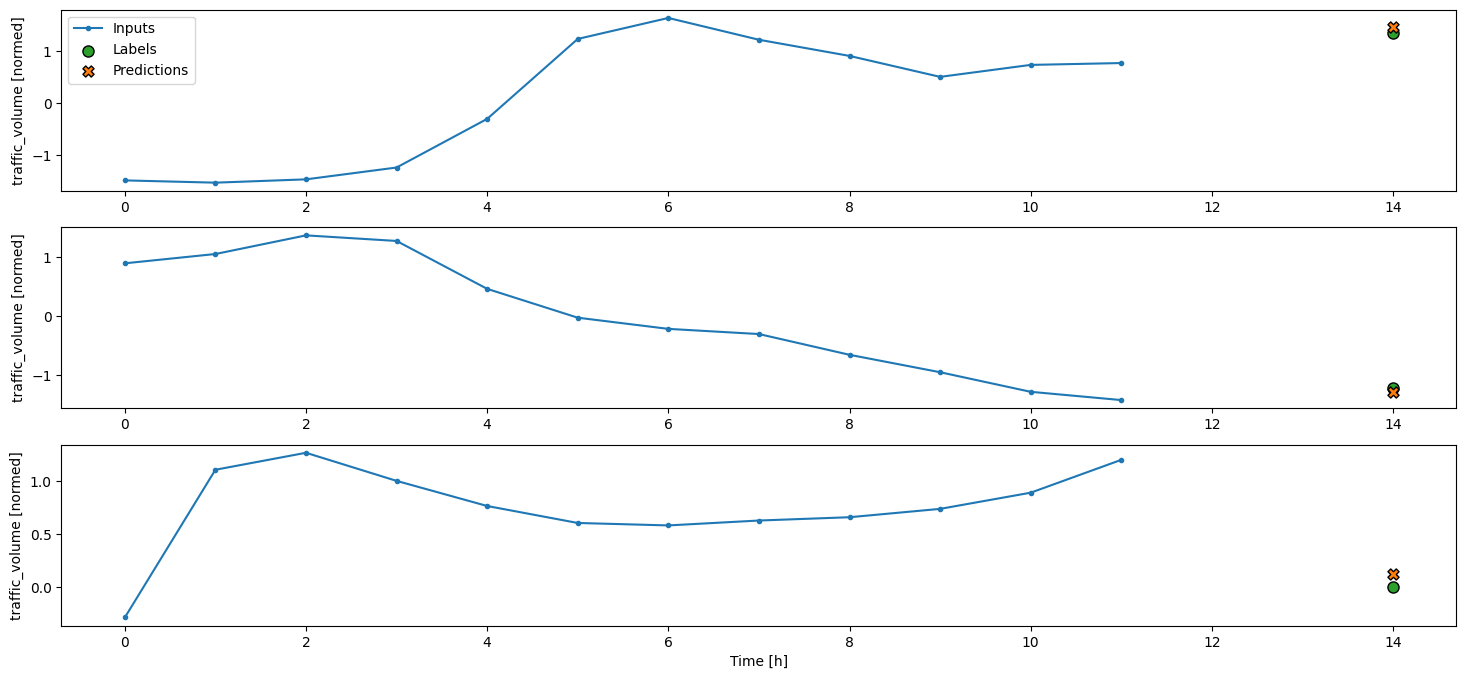

In [ ]:
cnn_LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(input_window_width,),
                           activation='relu'),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 30
LR = 0.01

history = compile_and_fit(cnn_LSTM_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['CNN_LSTM'] = cnn_LSTM_model.evaluate(window_5_1_2.val)
performance['CNN_LSTM'] = cnn_LSTM_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(cnn_LSTM_model)

MODEL PERFORMANCE COMPARISON 

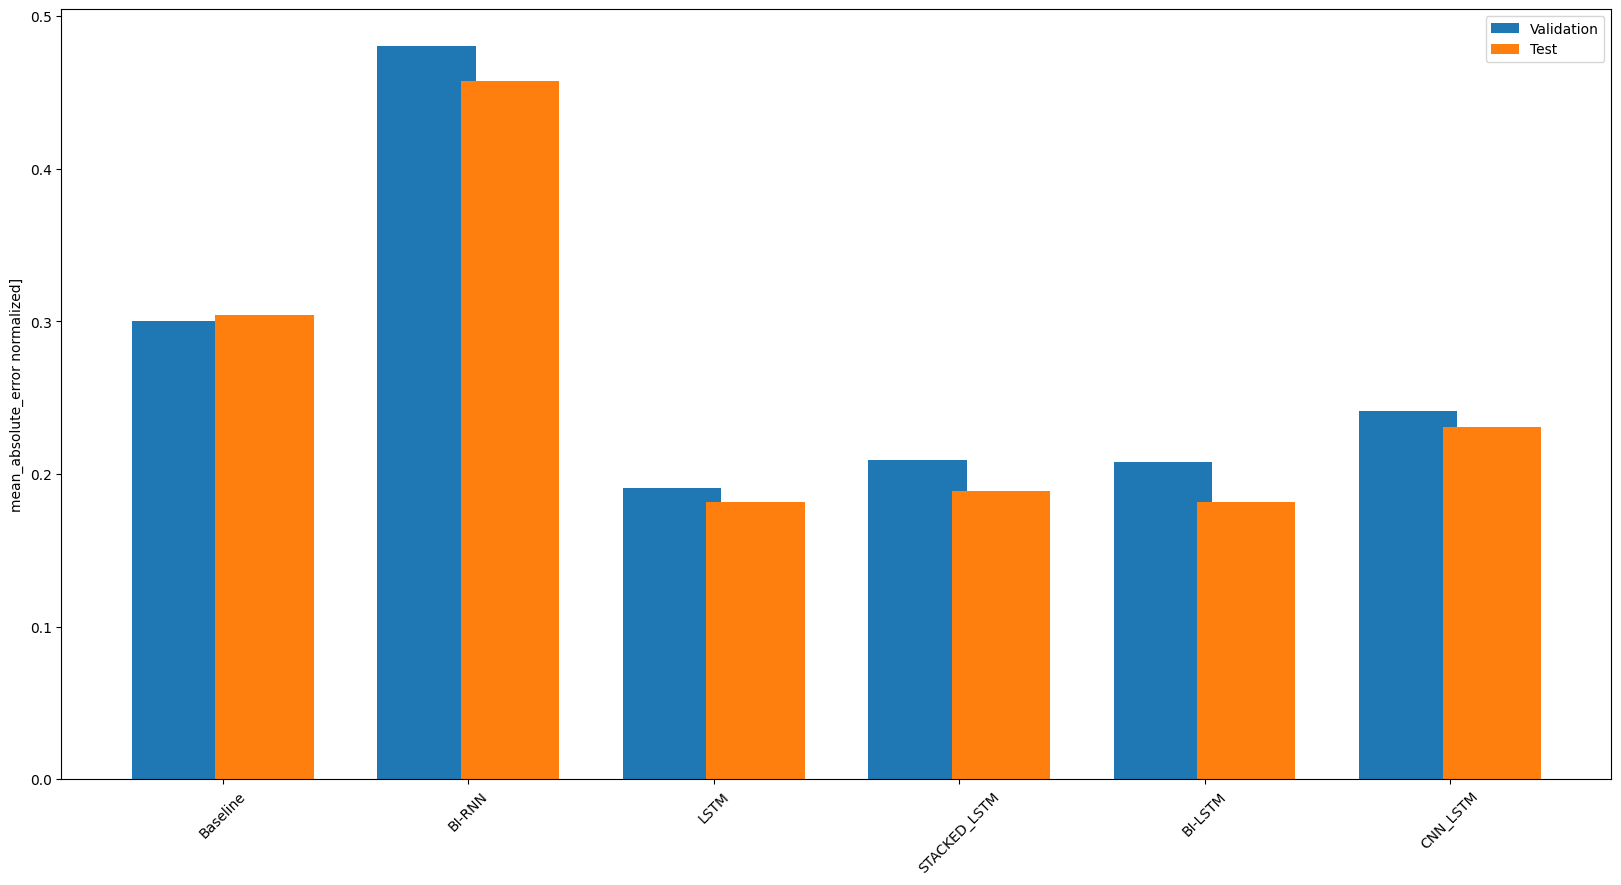

In [ ]:
x = np.arange(len(performance))
fig, ax = plt.subplots(figsize = (20,10))
width = 0.4
metric_name = 'mean_absolute_error'
metric_index = LSTM_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in val_performance.items():
    print(f'{name:12s}: {value[1]:0.4f} MAE SCORE')

Baseline    : 0.3004 MAE SCORE
BI-RNN      : 0.4805 MAE SCORE
LSTM        : 0.1906 MAE SCORE
STACKED_LSTM: 0.2089 MAE SCORE
BI-LSTM     : 0.2077 MAE SCORE
CNN_LSTM    : 0.2412 MAE SCORE


Fine Tuning the best model 

In [9]:
#NHK

In [ ]:
Stack_LSTM_model_fine_tuned = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 200
LR = 0.001

history = compile_and_fit(Stack_LSTM_model_fine_tuned,window_5_1_2, NUM_EPOCHS, LR )

In [ ]:
Bi_LSTM_model_fine_tuned = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dense(1)

])

NUM_EPOCHS = 200
LR = 0.001

history = compile_and_fit(Bi_LSTM_model_fine_tuned,window_5_1_2, NUM_EPOCHS, LR )

Making Prediction on Test Dataset

In [ ]:
Stack_LSTM_model_fine_tuned.evaluate(window_5_1_2.val)
Stack_LSTM_model_fine_tuned.evaluate(window_5_1_2.test)

156/156 [==============================] - 1s 3ms/step - loss: 0.0704 - mean_absolute_error: 0.1883


[0.07040898501873016, 0.1883096843957901]

In [ ]:
Bi_LSTM_model_fine_tuned.evaluate(window_5_1_2.val)
Bi_LSTM_model_fine_tuned.evaluate(window_5_1_2.test)

156/156 [==============================] - 0s 3ms/step - loss: 0.0706 - mean_absolute_error: 0.1796


[0.07060715556144714, 0.17960211634635925]

In [ ]:
preds = Stack_LSTM_model_fine_tuned.predict(window_5_1_2.test)
denormalized_preds = (np.squeeze(preds) * train_std["traffic_volume"]) + train_std["traffic_volume"]
denormalized_preds[:5]

156/156 [==============================] - 1s 2ms/step


array([-531.5774 ,  -88.63159, 1519.9098 , 4541.642  , 5246.7266 ],
      dtype=float32)

In [ ]:
row_numbers = np.arange(35589, 35589 + len(denormalized_preds))
submission_df = pd.DataFrame({'id': row_numbers, 'prediction': denormalized_preds})

submission_df.to_csv('sub_15.csv', index=False)